In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
df = pd.read_csv("Klasifikasi Tingkat Kemiskinan di Indonesia.csv", sep=";")
df.head()

,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Umur Harapan Hidup (Tahun),Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
0,ACEH,Simeulue,"18,98","9,48",7148.0,"66,41","65,28","71,56","87,45","5,71","71,15",1648096.0,0.0
1,ACEH,Aceh Singkil,"20,36","8,68",8776.0,"69,22","67,43","69,56","78,58","8,36","62,85",1780419.0,1.0
2,ACEH,Aceh Selatan,"13,18","8,88",8180.0,"67,44","64,4","62,55","79,65","6,46","60,85",4345784.0,0.0
3,ACEH,Aceh Tenggara,"13,41","9,67",8030.0,"69,44","68,22","62,71","86,71","6,43","69,62",3487157.0,0.0
4,ACEH,Aceh Timur,"14,45","8,21",8577.0,"67,83","68,74","66,75","83,16","7,13","59,48",8433526.0,0.0


In [162]:
# Rename nama kolom karena terlalu panjang
df.rename(columns={
    "Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)": "Persentase Penduduk Miskin",
    "Rata-rata Lama Sekolah Penduduk 15+ (Tahun)":"Lama Sekolah",
    "Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)": "Pengeluaran/kapita",
    "Indeks Pembangunan Manusia":"IPM",
    "Umur Harapan Hidup (Tahun)":"Umur Harapan Hidup",
    "Persentase rumah tangga yang memiliki akses terhadap sanitasi layak": "Akses Sanitasi Layak",
    "Persentase rumah tangga yang memiliki akses terhadap air minum layak":"Akses Air Minum Layak",
    "Tingkat Pengangguran Terbuka":"Tingkat Pengangguran",
    "PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)":"PDRB",
    "Tingkat Partisipasi Angkatan Kerja":"Partisipasi Angkatan Kerja"

}, inplace=True)

In [163]:
df.shape

(999, 13)

#  Data Cleaning

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Provinsi                    514 non-null    object 
 1   Kab/Kota                    514 non-null    object 
 2   Persentase Penduduk Miskin  514 non-null    object 
 3   Lama Sekolah                514 non-null    object 
 4   Pengeluaran/kapita          514 non-null    float64
 5   IPM                         514 non-null    object 
 6   Umur Harapan Hidup          514 non-null    object 
 7   Akses Sanitasi Layak        514 non-null    object 
 8   Akses Air Minum Layak       514 non-null    object 
 9   Tingkat Pengangguran        514 non-null    object 
 10  Partisipasi Angkatan Kerja  514 non-null    object 
 11  PDRB                        514 non-null    float64
 12  Klasifikasi Kemiskinan      514 non-null    float64
dtypes: float64(3), object(10)
memory us

In [165]:
df.isnull().sum()

Provinsi                      485
Kab/Kota                      485
Persentase Penduduk Miskin    485
Lama Sekolah                  485
Pengeluaran/kapita            485
IPM                           485
Umur Harapan Hidup            485
Akses Sanitasi Layak          485
Akses Air Minum Layak         485
Tingkat Pengangguran          485
Partisipasi Angkatan Kerja    485
PDRB                          485
Klasifikasi Kemiskinan        485
dtype: int64

In [166]:
df.dropna(inplace=True)

In [167]:
df.Provinsi.value_counts()

Provinsi
JAWA TIMUR              38
JAWA TENGAH             35
SUMATERA UTARA          33
PAPUA                   29
JAWA BARAT              27
SULAWESI SELATAN        24
ACEH                    23
NUSA TENGGARA TIMUR     22
SUMATERA BARAT          19
SULAWESI TENGGARA       17
SUMATERA SELATAN        17
LAMPUNG                 15
SULAWESI UTARA          15
KALIMANTAN BARAT        14
KALIMANTAN TENGAH       14
SULAWESI TENGAH         13
PAPUA BARAT             13
KALIMANTAN SELATAN      13
RIAU                    12
JAMBI                   11
MALUKU                  11
BENGKULU                10
MALUKU UTARA            10
NUSA TENGGARA BARAT     10
KALIMANTAN TIMUR        10
BALI                     9
BANTEN                   8
KEPULAUAN RIAU           7
KEP. BANGKA BELITUNG     7
DKI JAKARTA              6
GORONTALO                6
SULAWESI BARAT           6
KALIMANTAN UTARA         5
D I YOGYAKARTA           5
Name: count, dtype: int64

In [168]:
df['Kab/Kota'].value_counts()

Kab/Kota
Simeulue             1
Banggai Kepulauan    1
Tanah Bumbu          1
Tabalong             1
Hulu Sungai Utara    1
                    ..
Ciamis               1
Tasikmalaya          1
Garut                1
Bandung              1
Kota Jayapura        1
Name: count, Length: 514, dtype: int64

In [169]:
# Hapus kolom provinsi dan Kab/Kota karena memiliki banyak unique value

df.drop(['Provinsi', 'Kab/Kota'], axis=1, inplace=True)
df.head()

,Persentase Penduduk Miskin,Lama Sekolah,Pengeluaran/kapita,IPM,Umur Harapan Hidup,Akses Sanitasi Layak,Akses Air Minum Layak,Tingkat Pengangguran,Partisipasi Angkatan Kerja,PDRB,Klasifikasi Kemiskinan
0,"18,98","9,48",7148.0,"66,41","65,28","71,56","87,45","5,71","71,15",1648096.0,0.0
1,"20,36","8,68",8776.0,"69,22","67,43","69,56","78,58","8,36","62,85",1780419.0,1.0
2,"13,18","8,88",8180.0,"67,44","64,4","62,55","79,65","6,46","60,85",4345784.0,0.0
3,"13,41","9,67",8030.0,"69,44","68,22","62,71","86,71","6,43","69,62",3487157.0,0.0
4,"14,45","8,21",8577.0,"67,83","68,74","66,75","83,16","7,13","59,48",8433526.0,0.0


In [170]:
df.shape

(514, 11)

In [171]:
df.duplicated().sum()

0

In [172]:
# Ubah tipe object menjadi float dengan mengubah separator menjadi .
string_columns = df.select_dtypes(include=['object']).columns

for col in string_columns:
    df[col]=df[col].str.replace(",", ".").astype(float)
df.head()

,Persentase Penduduk Miskin,Lama Sekolah,Pengeluaran/kapita,IPM,Umur Harapan Hidup,Akses Sanitasi Layak,Akses Air Minum Layak,Tingkat Pengangguran,Partisipasi Angkatan Kerja,PDRB,Klasifikasi Kemiskinan
0,18.98,9.48,7148.0,66.41,65.28,71.56,87.45,5.71,71.15,1648096.0,0.0
1,20.36,8.68,8776.0,69.22,67.43,69.56,78.58,8.36,62.85,1780419.0,1.0
2,13.18,8.88,8180.0,67.44,64.40,62.55,79.65,6.46,60.85,4345784.0,0.0
3,13.41,9.67,8030.0,69.44,68.22,62.71,86.71,6.43,69.62,3487157.0,0.0
4,14.45,8.21,8577.0,67.83,68.74,66.75,83.16,7.13,59.48,8433526.0,0.0


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, 0 to 513
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Persentase Penduduk Miskin  514 non-null    float64
 1   Lama Sekolah                514 non-null    float64
 2   Pengeluaran/kapita          514 non-null    float64
 3   IPM                         514 non-null    float64
 4   Umur Harapan Hidup          514 non-null    float64
 5   Akses Sanitasi Layak        514 non-null    float64
 6   Akses Air Minum Layak       514 non-null    float64
 7   Tingkat Pengangguran        514 non-null    float64
 8   Partisipasi Angkatan Kerja  514 non-null    float64
 9   PDRB                        514 non-null    float64
 10  Klasifikasi Kemiskinan      514 non-null    float64
dtypes: float64(11)
memory usage: 48.2 KB


# EDA

array([[<Axes: title={'center': 'Persentase Penduduk Miskin'}>,
        <Axes: title={'center': 'Lama Sekolah'}>,
        <Axes: title={'center': 'Pengeluaran/kapita'}>],
       [<Axes: title={'center': 'IPM'}>,
        <Axes: title={'center': 'Umur Harapan Hidup'}>,
        <Axes: title={'center': 'Akses Sanitasi Layak'}>],
       [<Axes: title={'center': 'Akses Air Minum Layak'}>,
        <Axes: title={'center': 'Tingkat Pengangguran'}>,
        <Axes: title={'center': 'Partisipasi Angkatan Kerja'}>],
       [<Axes: title={'center': 'PDRB'}>,
        <Axes: title={'center': 'Klasifikasi Kemiskinan'}>, <Axes: >]],
      dtype=object)

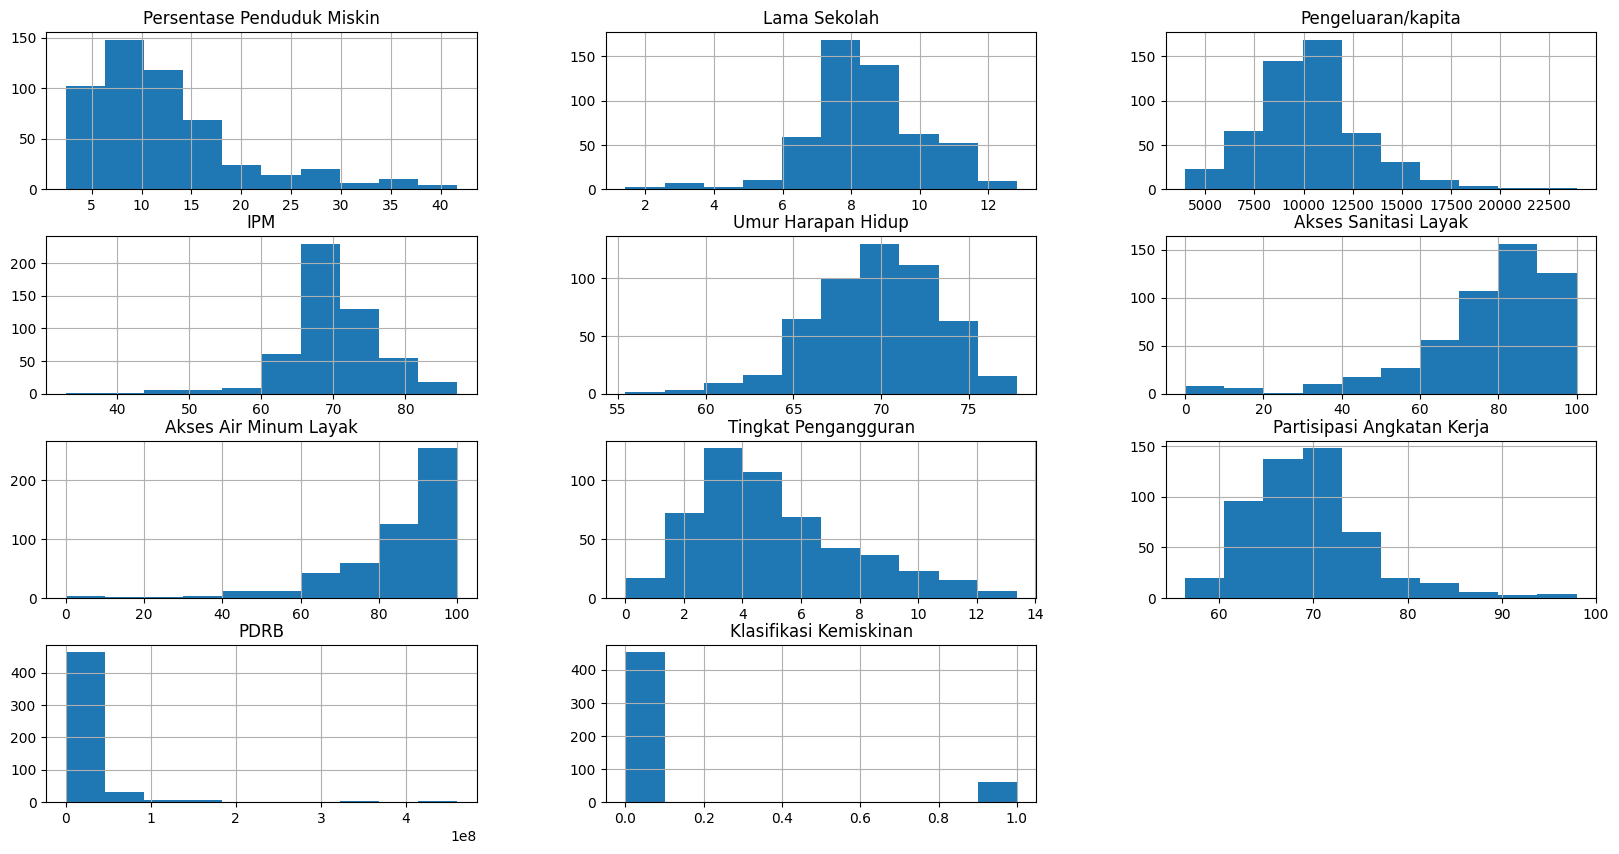

In [174]:
df.hist(figsize=(20,10))

array([[<Axes: title={'center': 'Persentase Penduduk Miskin'}>,
        <Axes: title={'center': 'Lama Sekolah'}>,
        <Axes: title={'center': 'Pengeluaran/kapita'}>],
       [<Axes: title={'center': 'IPM'}>,
        <Axes: title={'center': 'Umur Harapan Hidup'}>,
        <Axes: title={'center': 'Akses Sanitasi Layak'}>],
       [<Axes: title={'center': 'Akses Air Minum Layak'}>,
        <Axes: title={'center': 'Tingkat Pengangguran'}>,
        <Axes: title={'center': 'Partisipasi Angkatan Kerja'}>],
       [<Axes: title={'center': 'PDRB'}>,
        <Axes: title={'center': 'Klasifikasi Kemiskinan'}>, <Axes: >]],
      dtype=object)

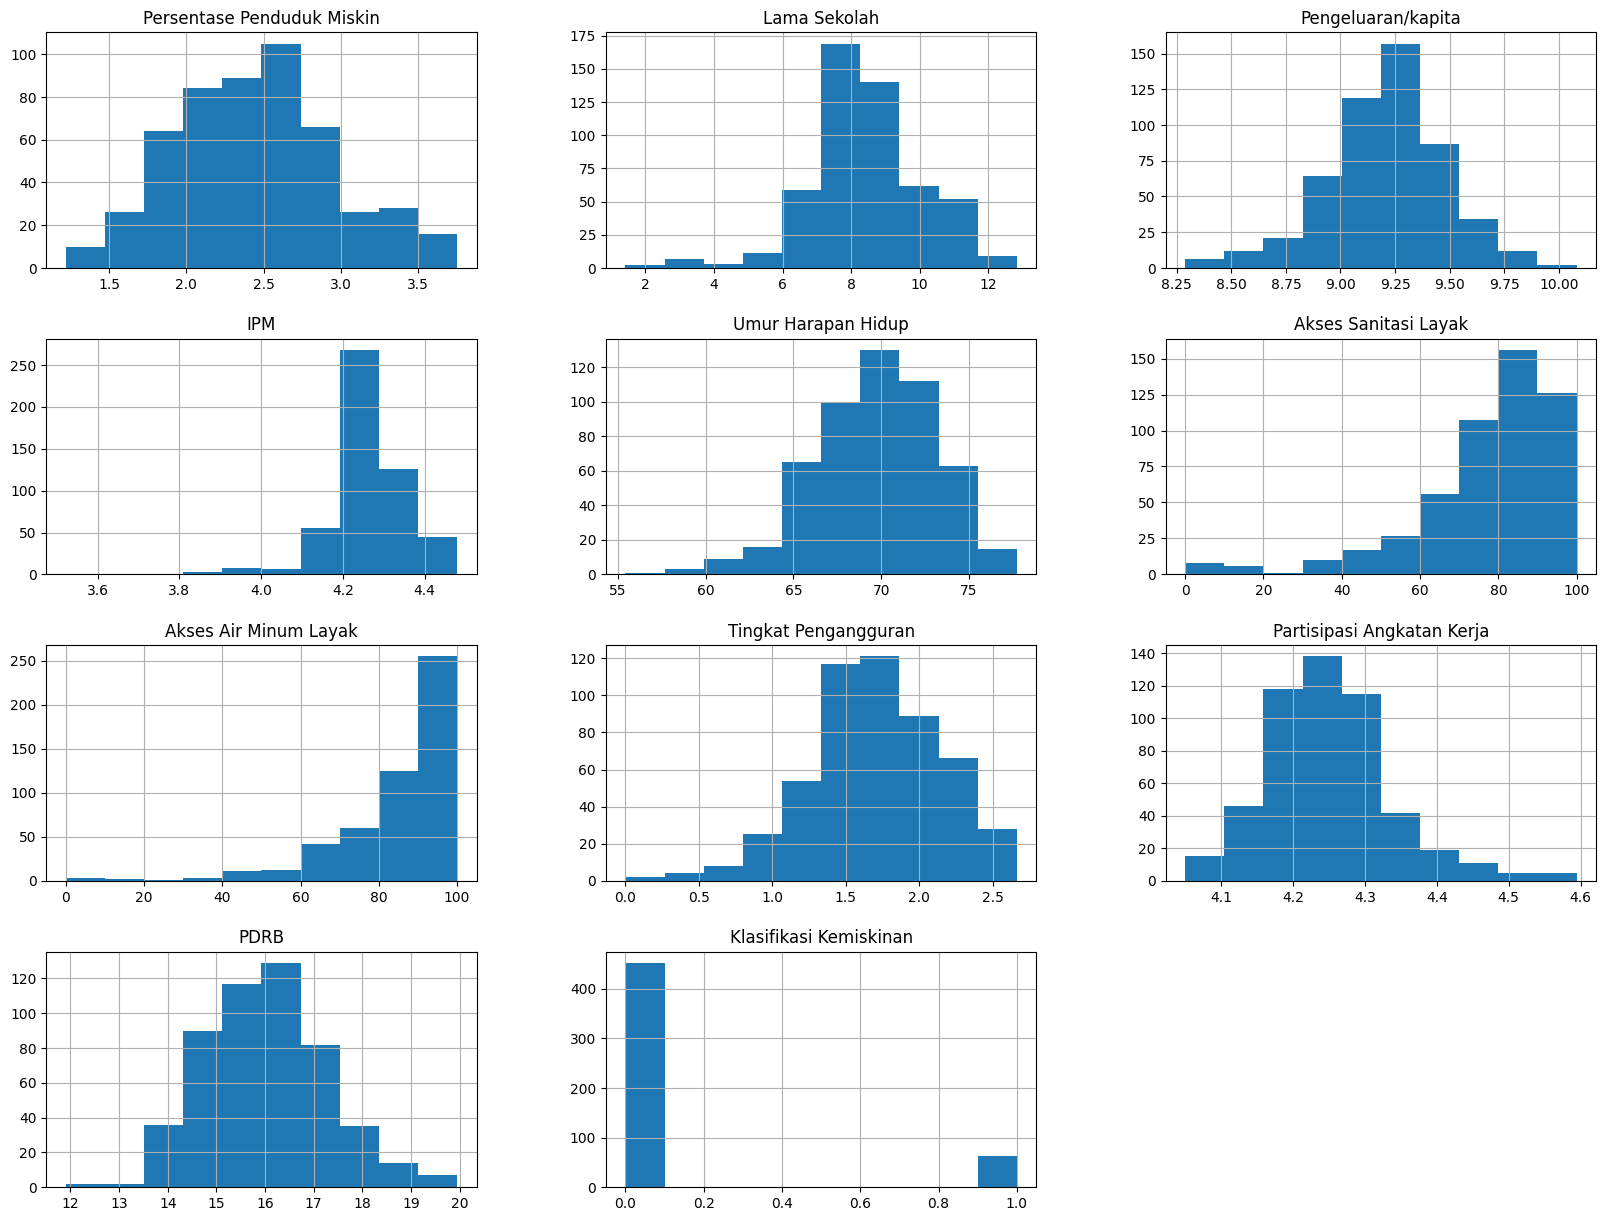

In [175]:
df['PDRB'] =np.log1p(df['PDRB'])
df['Partisipasi Angkatan Kerja'] =np.log1p(df['Partisipasi Angkatan Kerja'])
df['Persentase Penduduk Miskin'] =np.log1p(df['Persentase Penduduk Miskin'])
df['Pengeluaran/kapita'] =np.log1p(df['Pengeluaran/kapita'])
df['IPM'] =np.log1p(df['IPM'])
df['Tingkat Pengangguran'] =np.log1p(df['Tingkat Pengangguran'])
df.hist(figsize=(20,15))

In [176]:
df.describe()

,Persentase Penduduk Miskin,Lama Sekolah,Pengeluaran/kapita,IPM,Umur Harapan Hidup,Akses Sanitasi Layak,Akses Air Minum Layak,Tingkat Pengangguran,Partisipasi Angkatan Kerja,PDRB,Klasifikasi Kemiskinan
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,2.449401,8.436615,9.207739,4.257103,69.656809,77.202237,85.136615,1.705330,4.251212,16.012421,0.120623
std,0.516538,1.630842,0.267115,0.097886,3.447464,18.583555,15.701658,0.451125,0.087316,1.268203,0.326005
min,1.217876,1.420000,8.288283,3.521644,55.430000,0.000000,0.000000,0.000000,4.049870,11.901489,0.000000
25%,2.098018,7.510000,9.056606,4.214236,67.387500,70.217500,79.042500,1.430311,4.190715,15.111410,0.000000
50%,2.438419,8.305000,9.229898,4.257172,69.975000,81.800000,89.795000,1.716497,4.247852,15.991949,0.000000
75%,2.765533,9.337500,9.369052,4.305584,72.042500,89.882500,96.400000,2.018884,4.295140,16.797904,0.000000
max,3.753262,12.830000,10.081173,4.479380,77.730000,99.970000,100.000000,2.665143,4.594413,19.946913,1.000000


Pada variabel Persentase rumah tangga yang memiliki akses terhadap sanitasi layak dan Persentase rumah tangga yang memiliki akses terhadap air minum layak terdapat outlier

array([[<Axes: title={'center': 'Persentase Penduduk Miskin'}>,
        <Axes: title={'center': 'Lama Sekolah'}>,
        <Axes: title={'center': 'Pengeluaran/kapita'}>],
       [<Axes: title={'center': 'IPM'}>,
        <Axes: title={'center': 'Umur Harapan Hidup'}>,
        <Axes: title={'center': 'Akses Sanitasi Layak'}>],
       [<Axes: title={'center': 'Akses Air Minum Layak'}>,
        <Axes: title={'center': 'Tingkat Pengangguran'}>,
        <Axes: title={'center': 'Partisipasi Angkatan Kerja'}>],
       [<Axes: title={'center': 'PDRB'}>,
        <Axes: title={'center': 'Klasifikasi Kemiskinan'}>, <Axes: >]],
      dtype=object)

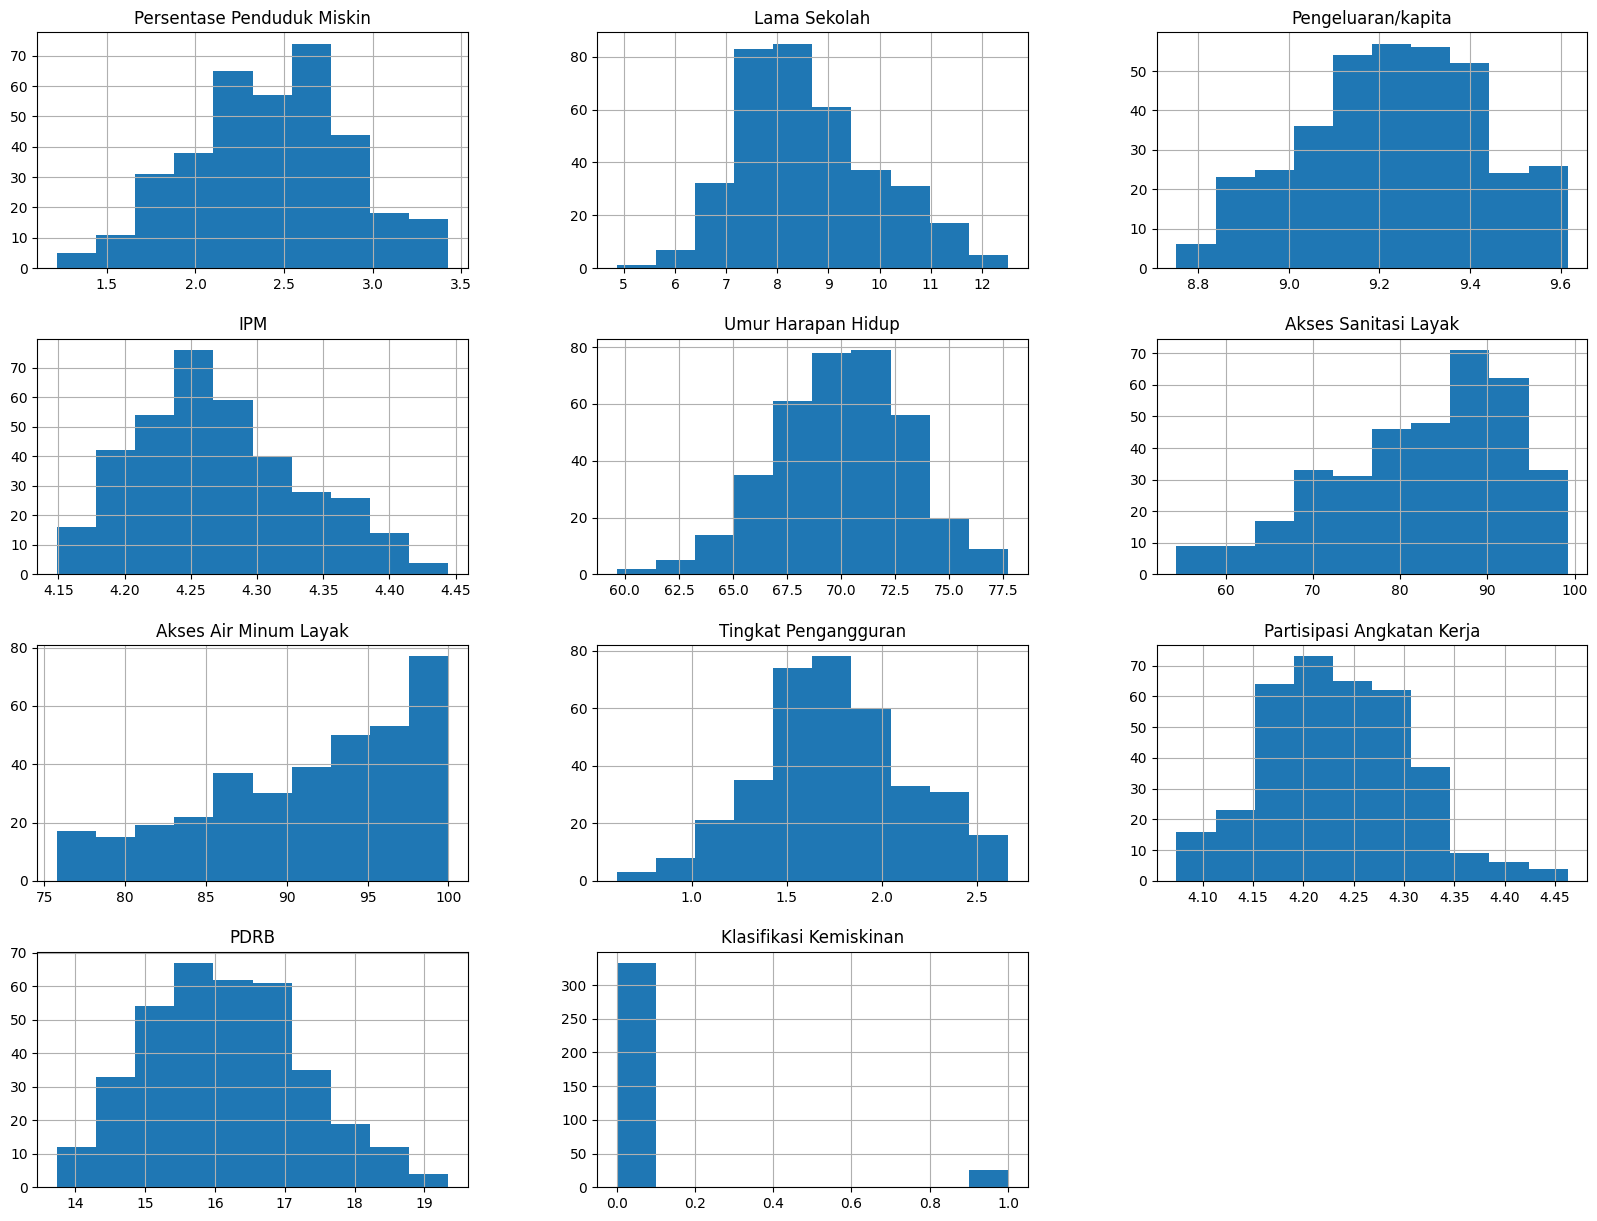

In [177]:
percentile_10_sanitasi = np.percentile(df['Akses Sanitasi Layak'], 10)
percentile_10_air = np.percentile(df['Akses Air Minum Layak'],20)
percentile_5_ipm = np.percentile(df['IPM'],5)
percentile_5_kapita = np.percentile(df['Pengeluaran/kapita'],95)
df = df[
    (df['Akses Sanitasi Layak'] >= percentile_10_sanitasi) & 
    (df['Akses Air Minum Layak'] >= percentile_10_air)&
    (df['IPM'] >= percentile_5_ipm)&
    (df['Pengeluaran/kapita'] <= percentile_5_kapita) 

]
df.hist(figsize=(20,15))

Data sudah terlihat terdistribusi secara normal

Text(0.5, 1.0, 'Indeks Pembangunan Manusia vs Rata-rata Lama Sekolah Penduduk 15+ (Tahun)')

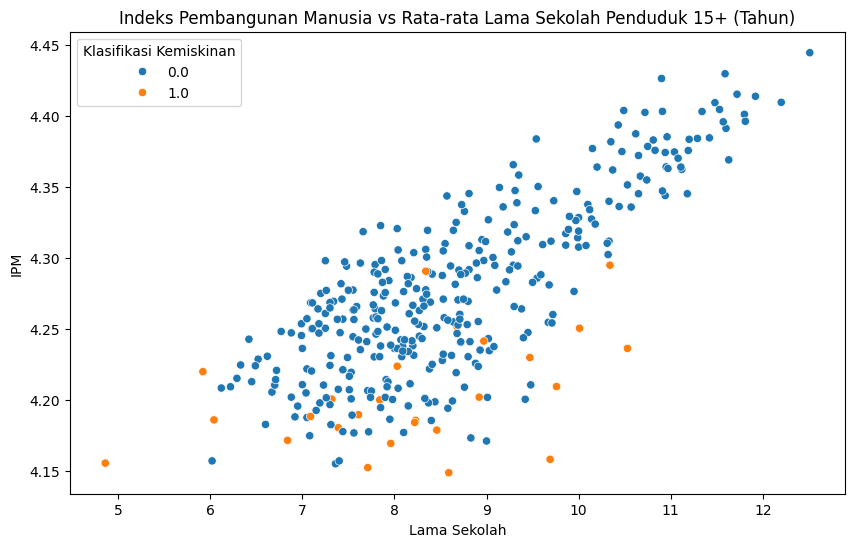

In [178]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x = 'Lama Sekolah', y='IPM', hue='Klasifikasi Kemiskinan')
plt.title("Indeks Pembangunan Manusia vs Rata-rata Lama Sekolah Penduduk 15+ (Tahun)")

Sudah terlihat cluster nya

<Axes: >

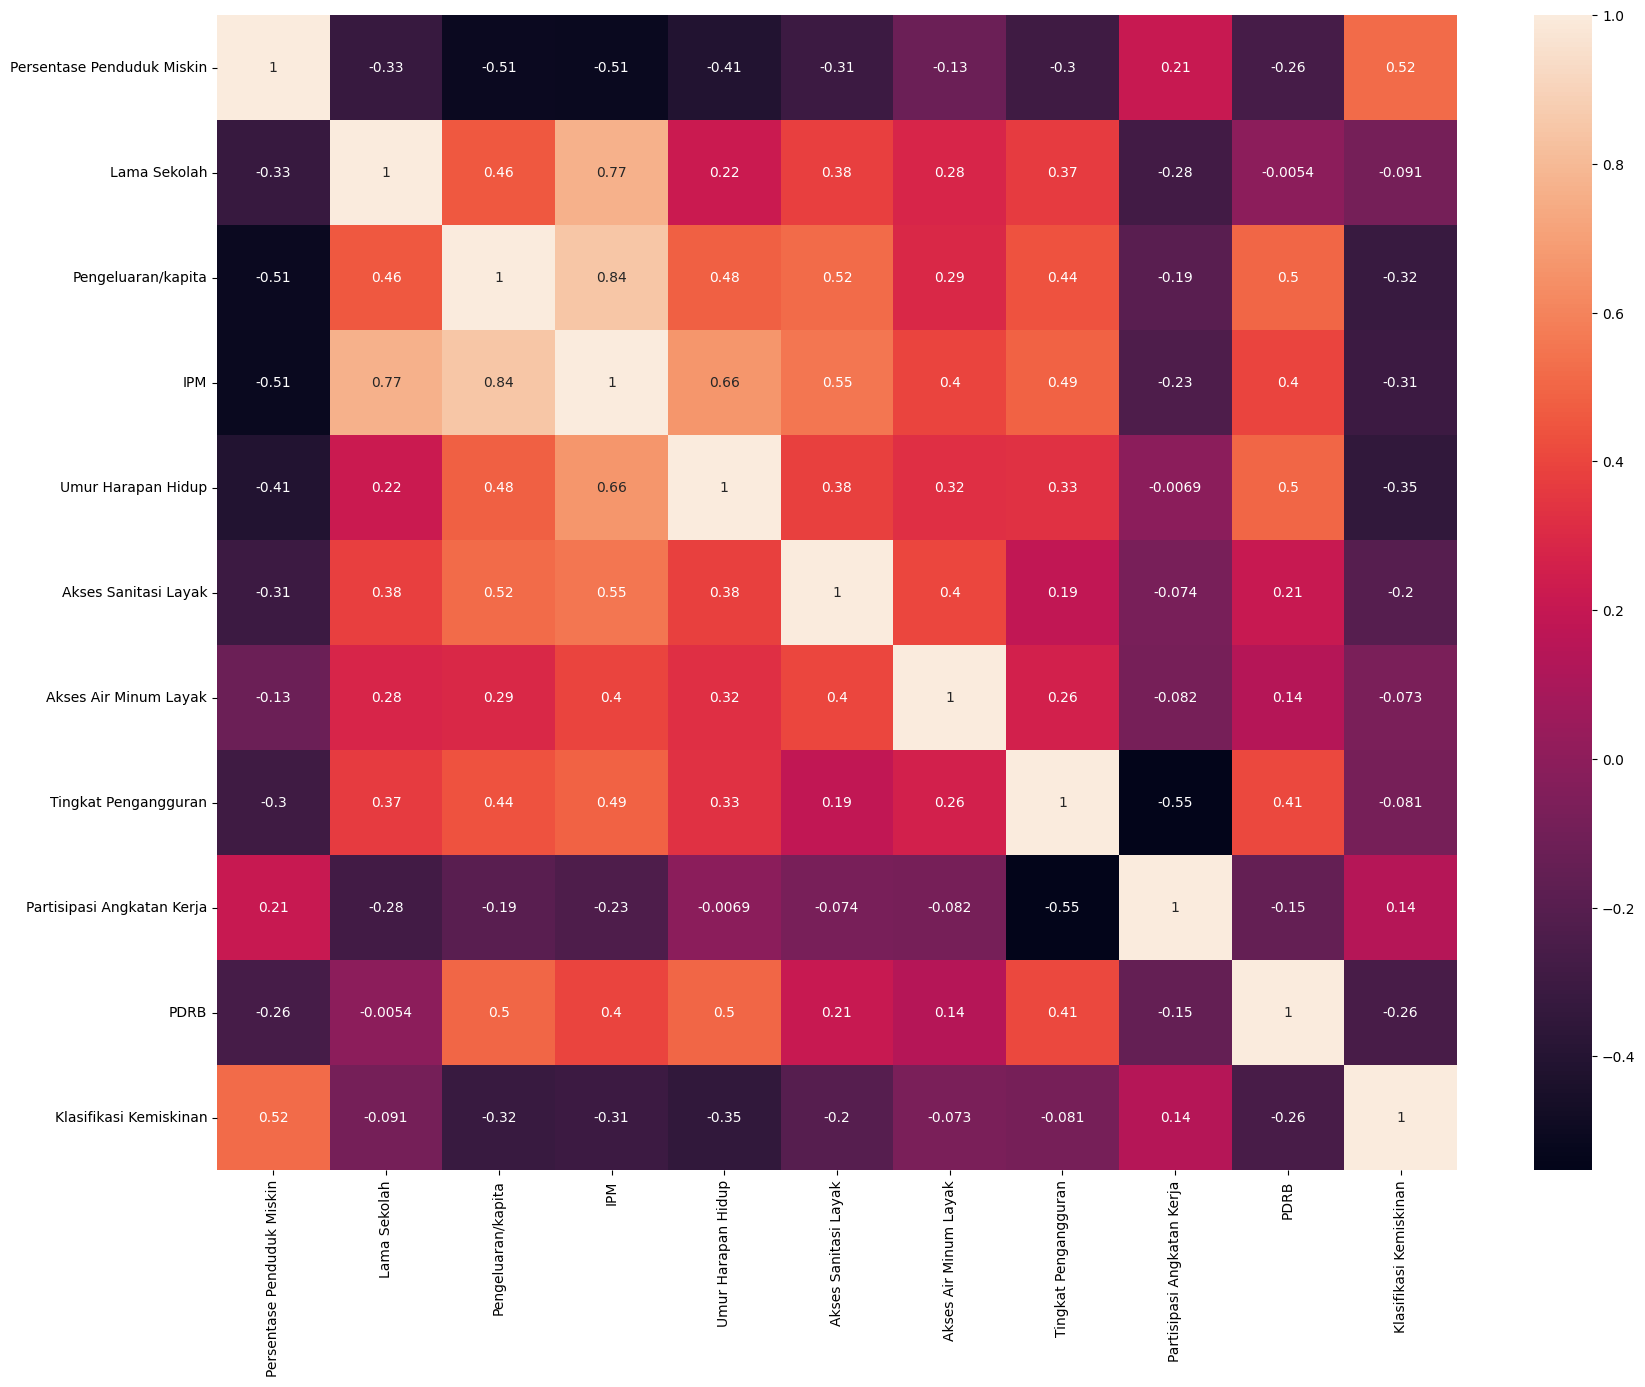

In [179]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

Text(0.5, 1.0, 'Tingkat Pengangguran vs Partisipasi Angkatan Kerja')

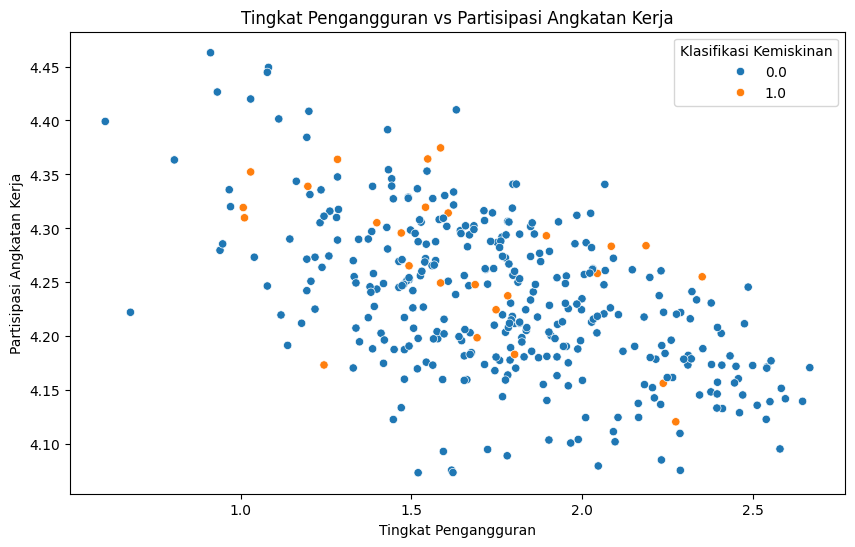

In [180]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x = 'Tingkat Pengangguran', y='Partisipasi Angkatan Kerja', hue='Klasifikasi Kemiskinan')
plt.title("Tingkat Pengangguran vs Partisipasi Angkatan Kerja")

Text(0.5, 1.0, 'Umur Harapan Hidup vs Indeks Pembangunan Manusia')

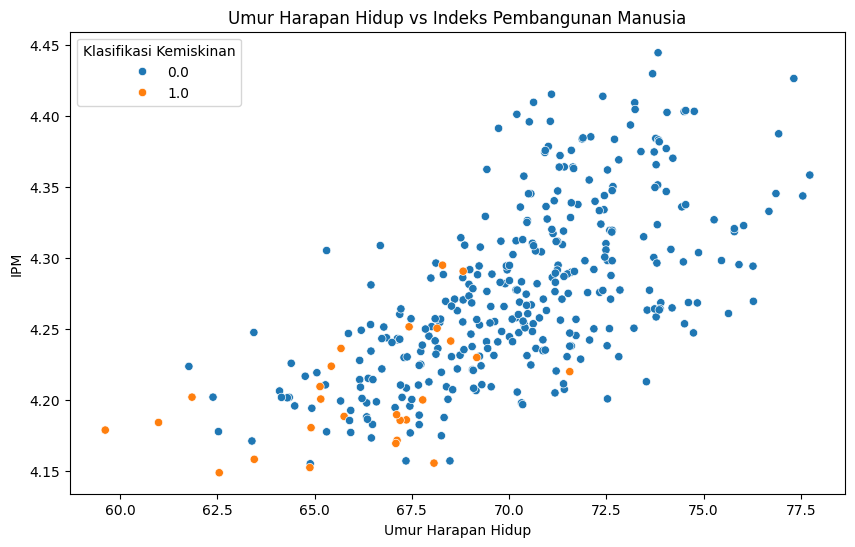

In [181]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x = 'Umur Harapan Hidup', y='IPM', hue='Klasifikasi Kemiskinan')
plt.title("Umur Harapan Hidup vs Indeks Pembangunan Manusia")

Text(0.5, 1.0, 'Pengeluaran per Kapita vs Indeks Pembangunan Manusia')

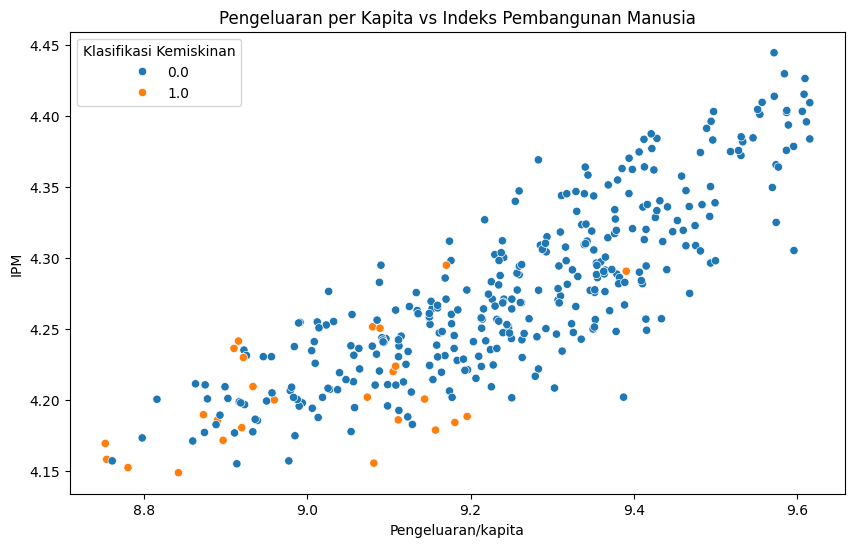

In [182]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x = 'Pengeluaran/kapita', y='IPM', hue='Klasifikasi Kemiskinan')
plt.title("Pengeluaran per Kapita vs Indeks Pembangunan Manusia")

In [201]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = df.drop('Klasifikasi Kemiskinan', axis=1)
y = df['Klasifikasi Kemiskinan']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)


In [202]:
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)


In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Misalkan x_train_s, y_train, x_test_s, y_test sudah ada setelah scaling

# 1. Pilih Model
model = LogisticRegression(C=20)

# 2. Latih Model
model.fit(x_train_s, y_train)

# 3. Evaluasi Model
y_pred = model.predict(x_test_s)
print(f'Akurasi: {accuracy_score(y_test, y_pred)}')
print(f'Klasifikasi Report:\n{classification_report(y_test, y_pred)}')

# 4. Hyperparameter Tuning (contoh)
param_grid = {'C': [0.1, 1, 5,10, 20]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train_s, y_train)

print(f'Hyperparameter Terbaik: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')




Akurasi: 0.9583333333333334
Klasifikasi Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        60
         1.0       1.00      0.75      0.86        12

    accuracy                           0.96        72
   macro avg       0.98      0.88      0.92        72
weighted avg       0.96      0.96      0.96        72

Hyperparameter Terbaik: {'C': 20}
Best Score: 0.9721718088324259


In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Misalkan x_train_s, y_train, x_test_s, y_test sudah ada setelah scaling

# 1. Pilih Model
model = LogisticRegression(C=20)

# 2. Latih Model
model.fit(x_train_s, y_train)

# 3. Evaluasi Model untuk Akurasi dan RMSE
y_pred = model.predict(x_test_s)
print(f'Akurasi: {accuracy_score(y_test, y_pred)}')
print(f'Klasifikasi Report:\n{classification_report(y_test, y_pred)}')

# Hitung Mean Squared Error (MSE)
y_prob = model.predict_proba(x_test_s)[:, 1]  # Prediksi probabilitas kelas positif
mse = mean_squared_error(y_test, y_prob)

print(f'Mean Squared Error: {mse}')


# 4. Hyperparameter Tuning (contoh)
param_grid = {'C': [0.1, 1, 5, 10, 20]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train_s, y_train)

print(f'Hyperparameter Terbaik: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')


Akurasi: 0.9583333333333334
Klasifikasi Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        60
         1.0       1.00      0.75      0.86        12

    accuracy                           0.96        72
   macro avg       0.98      0.88      0.92        72
weighted avg       0.96      0.96      0.96        72

Mean Squared Error: 0.03815132368645502
Hyperparameter Terbaik: {'C': 20}
Best Score: 0.9721718088324259
